# Program 2 Assignment <br>Marianne Strauss
**Marianne Strauss<br>CSCI 3412 - Algorithms**

# Introduction

This is a report with implemention of 3 search algorithms, first with pseudocode then implenting each search algorithm with python. Then each search algorithm's performance will be analyzed based on the written code. Finally a concordance of the complete works of Shakespeare is made using each search algorithm, with the concordance using a different datat strcuture for each.

Searching Algorithms

I have chosen 3 searching algorithms to implement and analyze:

Expected Running time | Searching Algorithm
--------------------------------- |--------------
$O(n)$ | Linear Search
$O(nlogn)$ | Binary Search with duplicate search
$O(1)$ | searching Hash table

### Assumptions Based on Assignment Prompt

Conconcordances are built using the following data structures: 
1. Unsorted sequence (vector or list)
2. Sorted sequence (vector or list)
3. Hash table

For the Sorted sequence, the sequance can be sorted at any time during process of building concordance


# Part 1 - Pseudo-Code

#### Linear Search
This is a simple algorithm and naive algrithm that simple iterates through the unsorted input sequentially. This means worse case the time complexity is $O(n)$, therefore good for small unsorted inputs.

```

LINEARSEARCH(A, x):
1  For i = 1 to A.length
2     if x = A[i]
3         return i
4     else
5         return -1

```
linear search just iterates through input looking for $x$. If $A[i]$ is equal to $x$ the function returns $i$ else it returns $-1$ or some sentinel to signify $x$ was not found.

#### Binary Search

For a sorted array binary search iteratively finds which part of the list that the key is located. It begins by comparing the element in the middle of the sorted input with the key. If it its is found key is returned otherwise the search contunies to the lower partition if the key is less than the middle element. If the key is greater that the key it proceeds through the upper partition. The process elimates the partition half the key is not in with each each iteration. If not found the search returns -1 or some sort of flag.

```
BINARYSEARCH(A, x):
1 n = A.length
2 L = 0
3 R = n - 1
4 while L <= R
5   m = floor((L + R) / 2)
6   if A[m] < x 
7       L = m + 1
8   else if A[m] > x
9       R = m -1
10  else
11      return m
12 return -1
```
the problem with this search for our uses with a concordance the search will find ANY exact matching element and it may not even be the first occurance and therefore will not search the the text and return all occurances. In order to count duplicates a function must be used with multiple binary searches to find the amount of each duplicate with a modified binary search.


```
BINARYSEARCH(A, x, Search):
1 n = A.length
2 L = 0
3 R = n - 1
4 found = -1
4 while L <= R
5   m = floor((L + R) / 2)
6   if x = A[m]
7       found = m
8       if Search
9            R = m -1
10      else
11           L = m + 1
12  elif x < A [m]
13      R = m -1
15  else
16      L = m + 1
17 return found
```
then binary search must used more than once to find the count

```
FINDDUPLICATES(A, x):
1 lower = BINARYSEARCH(A, x, True)
2 upper = BINARYSEARCH(A, x, False)\
3 count = upper - lower + 1
4 if upper = -1
5    return -1
6 else
7    return count
```
Above operation is I believe still $O(logn)$. It returns -1 if match is not found. and if found returns the count of duplicates. The solution above is based on an article by "Techie Delight", see citations.


#### Hash based search
Based on source (see citations). Hash search is very simple on average is $O(1)$ and is rarely at worst $O(n)$ if too many elements are hashed to a key.

```
HASHSEARCH(A, x):
1 hashvalue = hash(x)
2 list = A(h)
3 if list
4     return false
5 if list.contains(t)
6     return true
7 return false
```



# Static Analysis

## Linear Loop Invariant

#### Loop invariant:
At the start of each iteration of the for loop of lines 1 - 5 in part 2, for $i$ of $A[i]$ there is no $i$ that $A[i]$ equals $x$ (the target key).

##### Initialization:
Loop invariant holds before the first loop iteration because the previous index $A[0]$ is empty and therefore does not equal $x$.

##### Maintenance:
If the loop proceeds and $A[i] != v$ for the next iteration the invariant continues to hold.

##### Termination
If the key $x$ equals $A[i]$ then the loop terminates because the target was found and therefore the algorithm is correct



## Binary Search Loop Invariant


#### Loop invariant: 
At the start of each iteration of the for loop in lines 4-16 in part 2, partitions are $1 <= L <= R <= n$ and are therefore sectioning the list in the range $1 <= n$. Therefore if $x$ is in $A$ there is some index, $m$, where $ x = A[m]$.

##### Initialization:
Loop invariant holds before the first loop iteration because if $x$ is in $A$ then it will be in the range $1 <= n - 1$ when $A[m] = x$.

##### Maintenance:
Assume that prior to an iteration of the for loop in lines 12-17, there are three cases with the next iteration. Because $m$ is the mid point of the range $[L,R]$ if $A[m] = x$ the loop terminates, if $A[m] < x$ then it will search a new range of $[m + 1, R]$ and therefore the target index is $<= R$. Similarly when $A[m] < x$  it will search a new range of $[L, m - 1]$ and therefore the target index is $<= m - 1$. Therefore from these cases the invariant holds before the next iteration.

##### Termination
If  $A[m] < x$ the search has correctly searched the list and found the target in which the loop terminates as expected and the algorithm is therefore correct.



# Part 2 - Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import operator
import math
import time

Below is the function used to count number of comparisons and a global comparison counter.

In [2]:
n_comparisons = 0


def compare(f, x, y):
    global n_comparisons
    n_comparisons += 1
    return f(x,y)


Below is the function used to count number of assignments and a global assignment counter.

In [3]:
n_assignments = 0

def assign(a, i, x):
    global n_assignments
    n_assignments += 1
    a[i] = x

In [4]:

def dictassign(a, x, n = -1):
    global n_assignments
    n_assignments += 1
    if n > 0:
        a[x] = n

#### *NOTE the above functions are based on code from Assignment 0 Sample report and refactored using operator module, works cited.

### Getting Words

In [5]:

def readFile(filename):
    book = [''] * 1016578
    with open(filename, 'r') as reader:
        i = 0
        while True:
            line = reader.readline()
            if not line:
                return book
            else:
                book[i] = line 
                i += 1
sortedList = readFile('wordlist.txt')
unsortedList = readFile('wordlist.txt')

sortedList = [each_string.lower() for each_string in sortedList]
sortedList = sorted(sortedList)

### Creating Concordances

In [6]:
conc1 = {}
conc2 = [''] * 30000
conc3 = [''] * 30000

comparison_dataframe = pd.DataFrame(columns = ['Algo Name', 'Comparisons', 'Assignments'])

### Linear Search Implementation

In [7]:
n_comparisons = 0

def linearSearch(a, x):
    for i in range(0, len(a)):
        if compare(operator.eq, a[i], x):
            return i
    return -1      

#### Testing of Linear Search

In [8]:
test= [4,3,5,1,7]

print(linearSearch(test, 1))

string = "Number of comparisons: "
print(string, n_comparisons)

3
Number of comparisons:  4


### Binary Search Implementation


In [9]:

def binarySearch(a, x, Search = None):
    n = len(a)
    L = 0
    R = n - 1
    found = -1
    
    while L <= R:
        m = (L + R) // 2
        if compare(operator.eq, a[m], x):
            found = m
            if Search:
                R = m - 1
            else:
                L = m + 1
        elif compare(operator.lt, x, a[m]):
            R = m - 1

        else:
            L = m + 1
    return found

In [10]:
test= [5,2,4,7,1,3,2,1,8]

print(binarySearch(test, 1))
print(test)

string = "Number of comparisons: "
print(string, n_comparisons)

4
[5, 2, 4, 7, 1, 3, 2, 1, 8]
Number of comparisons:  9


In [11]:
global n_comparisons
n_comparisons = 0

def findDupes(a, x):
    lower = binarySearch(a, x, True)
    upper = binarySearch(a, x, False)
    count = upper - lower + 1
    if upper == -1:
         return -1
    else:
        return count

In [12]:
test= [1,2,2,3,5,6,9,9,20]

print(findDupes(test, 5))

string = "Number of comparisons: "
print(string, n_comparisons)

1
Number of comparisons:  12


## Unsorted sequence

In [13]:
global n_comparisons
global n_assignments

n_comparisons = 0
n_assignments = 0

occurances = [0] * 30000

def linearSearchModified(a, x, start):
    for i in range(start, len(a)):
        if compare(operator.eq, a[i], x):
            return i
    return -1

wordNum = 0
for i in range(0, len(unsortedList)):
    word = unsortedList[i].lower()
    if word[0].isalpha():
        if not word in conc2:
            
            flag = i
            num = 1
            while flag > -1:
                index = linearSearchModified(unsortedList, word , flag + 1)
                flag = index
                if flag > 0:
                    num += 1

            assign(conc2, wordNum, word)
            assign(occurances, wordNum, num)
            wordNum += 1

comparison_dataframe.loc[0] = ['Linear Search Build', n_comparisons, n_assignments]
print(wordNum)
string = "Number of comparisons: "
print(string, n_comparisons)
string = "Number of assignments: "
print(string, n_assignments)

27886
Number of comparisons:  18734808147
Number of assignments:  55772


### Verification algo worked

In [14]:

tempList = list(zip(conc2, occurances))

sortedDisplayList = sorted(tempList)
sortedDisplayList = list(filter(lambda x: not "" in x, sortedDisplayList))

for i in range(0, 10):
    print(sortedDisplayList[i])

print('...')

for i in range(len(sortedDisplayList) - 10, len(sortedDisplayList)):
    print(sortedDisplayList[i])
    


('a\n', 12156)
("a'\n", 102)
("a's\n", 1)
('a-bat-fowling\n', 1)
('a-bed\n', 12)
('a-birding\n', 4)
('a-bleeding\n', 2)
('a-breeding\n', 1)
('a-brewing\n', 1)
('a-broach\n', 1)
...
('zenelophon\n', 1)
('zenith\n', 1)
('zephyrs\n', 1)
('zo\n', 1)
('zodiac\n', 1)
('zodiacs\n', 1)
('zone\n', 1)
('zounds\n', 1)
('zur\n', 2)
('zwaggered\n', 1)


## Sorted Sequence

In [15]:
global n_comparisons
global n_assignments

n_comparisons = 0
n_assignments = 0

occurances = [0] * 30000

wordNum = 0
for i in range(0, len(sortedList)):
    word = sortedList[i].lower()
    if word[0].isalpha():
        if not word in conc3:
            num = findDupes(sortedList, word)
            assign(conc3, wordNum, word)
            assign(occurances, wordNum, num)
            wordNum += 1

comparison_dataframe.loc[1] = ['Binary Search Build', n_comparisons, n_assignments]            
print("Number of unique words:", wordNum)
string = "Number of comparisons: "
print(string, n_comparisons)
string = "Number of assignments: "
print(string, n_assignments)


tempList = list(zip(conc3, occurances))

# sortedDisplayList = sorted(tempList)
sortedDisplayList = list(filter(lambda x: not "" in x, tempList))

for i in range(0, 10):
    print(sortedDisplayList[i])

print('...')

for i in range(len(sortedDisplayList) - 10, len(sortedDisplayList)):
    print(sortedDisplayList[i])


Number of unique words: 27886
Number of comparisons:  2127668
Number of assignments:  55772
('a\n', 13679)
("a'\n", 120)
("a's\n", 1)
('a-bat-fowling\n', 1)
('a-bed\n', 12)
('a-birding\n', 4)
('a-bleeding\n', 2)
('a-breeding\n', 1)
('a-brewing\n', 1)
('a-broach\n', 1)
...
('zenelophon\n', 1)
('zenith\n', 1)
('zephyrs\n', 1)
('zo\n', 1)
('zodiac\n', 1)
('zodiacs\n', 1)
('zone\n', 1)
('zounds\n', 1)
('zur\n', 2)
('zwaggered\n', 1)


## Hash Table

In [16]:
global n_comparisons
global n_assignments

n_comparisons = 0
n_assignments = 0

wordNum =0
for i in range(0, len(unsortedList)):
    word = unsortedList[i].lower()
    if not (word == ''):
        if word[0].isalpha():
        
            if conc1.get(word):
                num = conc1[word]
                num += 1
                dictassign(conc1, word, num)
            else:
                dictassign(conc1, word, 1)
                wordNum +=1

                
concTemp = sorted(conc1)
sortedConc1 = {key:conc1[key] for key in concTemp}

comparison_dataframe.loc[2] = ['Hash Based Build', n_comparisons, n_assignments]   
string = "Number of unique words: "
print(string, wordNum)
string = "Number of comparisons: "
print(string, n_comparisons)
string = "Number of assignments: "
print(string, n_assignments)

for x in list(sortedConc1)[0:10]:
    print("key: {}, value: {} ".format(x.rstrip('\n'),  sortedConc1[x]))
for x in list(sortedConc1)[(len(sortedConc1) - 10):len(sortedConc1)]:
    print("key: {}, value: {} ".format(x.rstrip('\n'), sortedConc1[x]))

Number of unique words:  27886
Number of comparisons:  0
Number of assignments:  807861
key: a, value: 13679 
key: a', value: 120 
key: a's, value: 1 
key: a-bat-fowling, value: 1 
key: a-bed, value: 12 
key: a-birding, value: 4 
key: a-bleeding, value: 2 
key: a-breeding, value: 1 
key: a-brewing, value: 1 
key: a-broach, value: 1 
key: zenelophon, value: 1 
key: zenith, value: 1 
key: zephyrs, value: 1 
key: zo, value: 1 
key: zodiac, value: 1 
key: zodiacs, value: 1 
key: zone, value: 1 
key: zounds, value: 1 
key: zur, value: 2 
key: zwaggered, value: 1 


# Part 3 - Analysis

In [17]:
comparison_dataframe

,Algo Name,Comparisons,Assignments
0,Linear Search Build,18734808147,55772
1,Binary Search Build,2127668,55772
2,Hash Based Build,0,807861


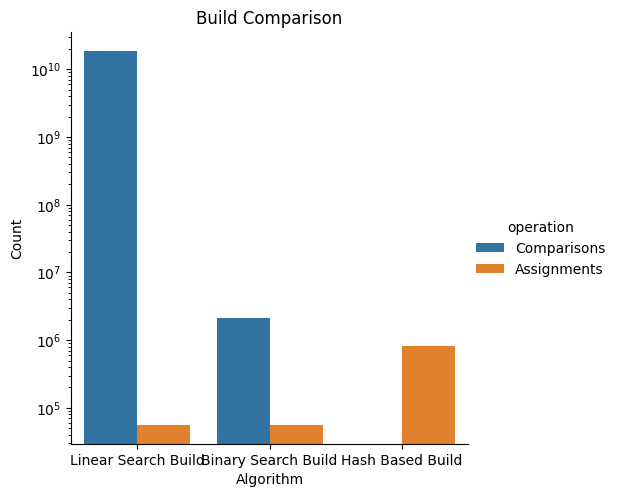

In [28]:
df_melted = pd.melt(comparison_dataframe, id_vars=['Algo Name'], var_name='operation', value_name='count')
g = sb.catplot(x='Algo Name', y='count', hue='operation', data=df_melted, kind='bar')
plt.title('Build Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')
plt.show()

Based on my previous expectations each algorithm performed as expected. The linear search because it had to search through a portion of the entire list most likely multiple times for each unique word of the list the number of comparisons were approx 18 billion. Assignments meets epectations because the concordance is structured at first using two lists, the Linear Search Build did 2 assignments per unique word. Which is the same with the Binary Search Build. Both numbers are accurate.

Binary search build seems to meet expectations because for each unique word it had to look for duplicates so comparisons would be slightly higher than expected but are far less compared to the Linear Search Build.

Lastly with the Hash based Build assignments seem higher than expected because an assignment is used for a newly found word and for its duplicates.

# Citations

1. Wikipedia contributors. "Binary search algorithm." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 16 Mar. 2023. Web. 16 Mar. 2023.
2. Cormen, Thomas H., and Charles E. Leiserson. Introduction to Algorithms, 3rd Edition. The MIT Press, 2009.
3. “Algorithms in a Nutshell.” O'Reilly Online Learning, O'Reilly Media, Inc., https://www.oreilly.com/library/view/algorithms-in-a/9780596516246/ch05s04.html. 
4. “Count Occurrences of a Number in a Sorted Array with Duplicates.” Techie Delight, 16 Sept. 2021, https://www.techiedelight.com/count-occurrences-number-sorted-array-duplicates/. 
5. Williams, Doug. “Sample Programming Assignment Sorting Using Permutations .” Program 0 - Permutation-Based Sorting, 5 Jan. 2023.